In [1]:
#import required libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Load Train and test data

In [5]:
#Import train dataset
df_train = pd.read_csv('train.csv')
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979


In [6]:
#Import test dataset
df_test = pd.read_csv('test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [7]:
#Import train_label dataset
df_train_label = pd.read_csv('train_label.csv', header = None)
df_train_label

,0
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [8]:
#Import test_label dataset
df_test_label = pd.read_csv('test_label.csv', header = None)
df_test_label

,0
0,256
1,87
2,11
3,84
4,668
...,...
2173,3
2174,144
2175,159
2176,29


Add column name as'Total_booking' in train_label dataset

In [9]:
col_name = ['Total_booking']
df_train_label = df_train_label.set_axis(col_name, axis = 'columns',inplace = False)
df_train_label

<ipython-input-9-50d0b5447577>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_train_label = df_train_label.set_axis(col_name, axis = 'columns',inplace = False)


,Total_booking
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


Append train_label.csv dataset to train.csv dataset

In [10]:
data = pd.concat([df_train, df_train_label], axis=1)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


Shape of Train and test datasets

In [11]:
df_train.shape

(8708, 9)

In [12]:
df_test.shape

(2178, 9)

In [13]:
data.shape

(8708, 10)

Observation : test size is 0.25

Datatypes of each column

In [14]:
#print(df_train.dtypes)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 612.4+ KB


Observation : dataset contains 9 columns with 3 integer variables, 3 float variables and 3 Categorical variables

Checking for missing values

In [15]:
data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

Observation : Dataset has no missing values

Feature Engineering

Create new columns date, hour, weekDay, month from datetime column

In [16]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data['hour'] = data['datetime'].dt.hour
data['weekDay'] = data['datetime'].dt.day_name()
data['month'] = data['datetime'].dt.month_name()
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,Monday,January
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,Thursday,November
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,Wednesday,November


Conversion to Categorical Variables

In [17]:
data['season'] = data['season'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weather'] = data['weather'].astype('category')

In [18]:
data.dtypes

datetime         datetime64[ns]
season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                  object
month                    object
dtype: object

Drop the datetime column

In [19]:
data = data.drop('datetime', axis=1)


In [20]:
df = pd.DataFrame(data)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,Wednesday,November


Outlier Analysis:

Plot Boxplots for detecting outliers

<Axes: xlabel='temp'>

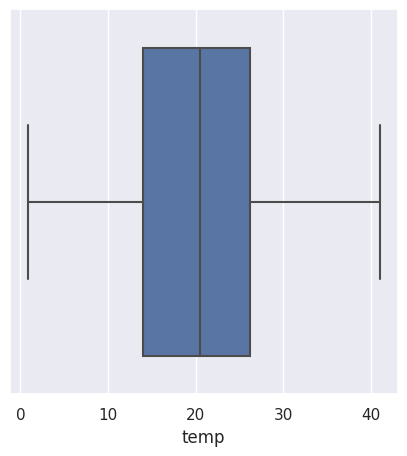

In [21]:
#Boxplot for temp
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='temp',data=df)

<Axes: xlabel='atemp'>

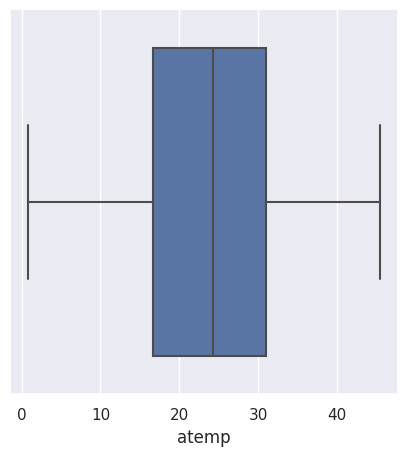

In [22]:
#Boxplot for atemp
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="atemp",data=df)

<Axes: xlabel='humidity'>

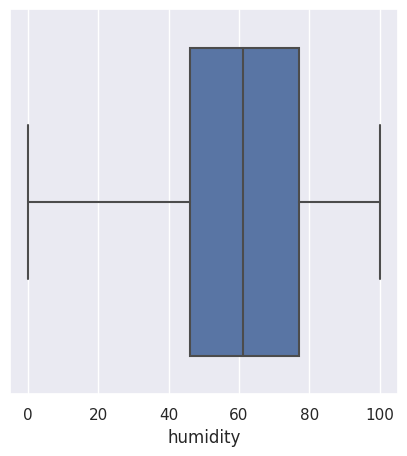

In [23]:
#Boxplot for humidity
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="humidity",data=df)

<Axes: xlabel='windspeed'>

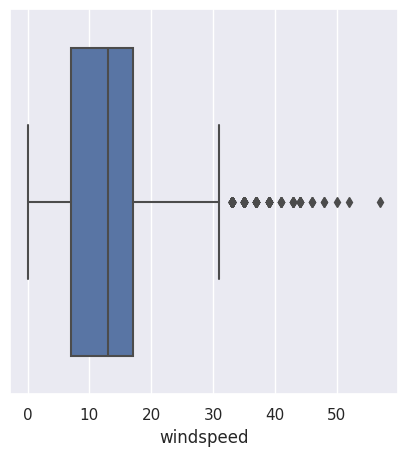

In [24]:
#Boxplot for windspeed
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="windspeed",data=df)

<Axes: xlabel='Total_booking'>

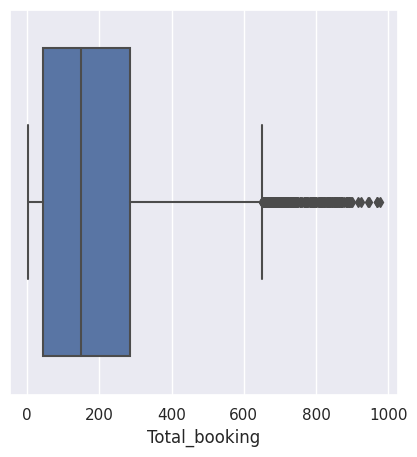

In [25]:
#Boxplot for Total_booking
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="Total_booking",data=df)

<Axes: xlabel='hour'>

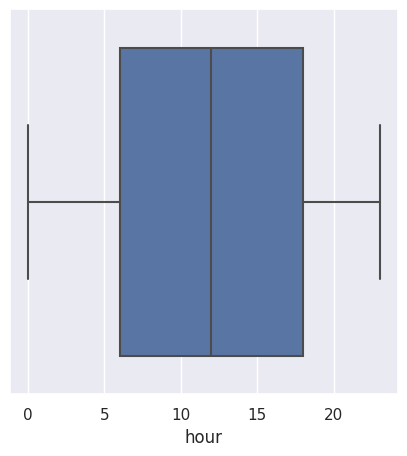

In [26]:

#Boxplot for hour
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="hour",data=df)

Inferences : There are few outliers present in windspeed and Total_booking columns

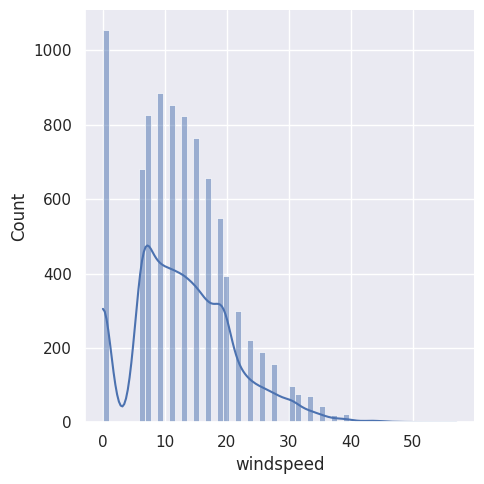

In [27]:
#Checking the distribution of windspeed column
sns.displot(x="windspeed", data = df, kde = True)

<Axes: xlabel='Total_booking', ylabel='Count'>

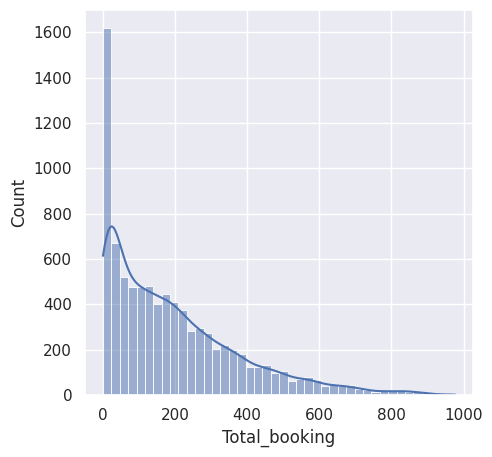

In [28]:
#Checking the distribution of Total_booking column
sns.histplot(x="Total_booking", data = df, kde = True)

Outlier detection and removal :

As per the above distribution plots, the distribution of data is not a normal distribution, Hence we may use IQR method for Outlier removal

Outlier detection and removal for windspeed column

In [29]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3-Q1
IQR

9.996400000000001

In [30]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
lower_limit,upper_limit

(-7.993100000000002, 31.992500000000003)

In [31]:
#Printing outliers in windspeed column
df_windspeed = pd.DataFrame(df[(df['windspeed'] <= lower_limit) | (df['windspeed'] >= upper_limit)]['windspeed'])
df_windspeed

,windspeed
10,32.9975
32,32.9975
86,32.9975
105,36.9974
182,35.0008
...,...
8496,32.9975
8555,36.9974
8563,32.9975
8603,35.0008


Inference : There are 182 Outliers in windspeed column

In [32]:
#data after removing outliers in windspeed column
df1 = df[(df['windspeed'] >= lower_limit) & (df['windspeed'] <= upper_limit)]
df1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,Wednesday,November


<Axes: xlabel='windspeed'>

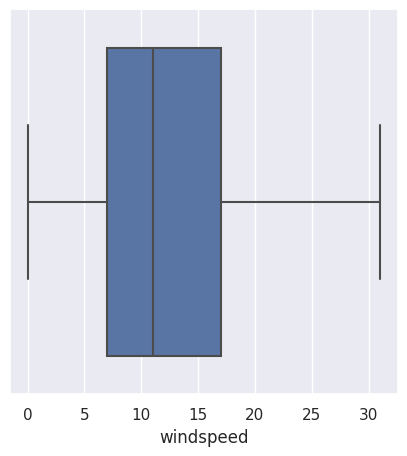

In [33]:
#Boxplot for windspeed after removing outliers
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="windspeed",data=df1)

Outlier detection and removal for Total_booking column

In [34]:
Q1 = df1['Total_booking'].quantile(0.25)
Q3 = df1['Total_booking'].quantile(0.75)
IQR = Q3-Q1
IQR

243.0

In [35]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
lower_limit,upper_limit

(-321.5, 650.5)

In [36]:
#Printing Outliers in Total_booking column
df_totalbooking = pd.DataFrame(df1[(df1['Total_booking']<=lower_limit)|(df1['Total_booking']>=upper_limit)]['Total_booking'])
df_totalbooking

,Total_booking
5,791
27,813
30,872
52,790
70,669
...,...
8478,662
8582,737
8676,659
8681,858


There are 235 Outliers in Total_booking column

In [37]:
#data after removal of outliers in Total_booking column
df2 = df1[(df1['Total_booking']>=lower_limit)&(df1['Total_booking']<=upper_limit)]
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,Wednesday,November


In [38]:
new_df = pd.DataFrame(df2)
new_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,1,Wednesday,November


Correlation Analysis

In [40]:
#Check correlation between the features
corr = new_df[["Total_booking","temp","atemp","humidity","windspeed"]].corr()

In [41]:
#Print correlation matrix
corr


,Total_booking,temp,atemp,humidity,windspeed
Total_booking,1.000000,0.386336,0.383333,-0.318384,0.117670
temp,0.386336,1.000000,0.985352,-0.059516,-0.012856
atemp,0.383333,0.985352,1.000000,-0.039574,-0.052472
humidity,-0.318384,-0.059516,-0.039574,1.000000,-0.301955
windspeed,0.117670,-0.012856,-0.052472,-0.301955,1.000000


<Axes: title={'center': 'Correlation between features'}>

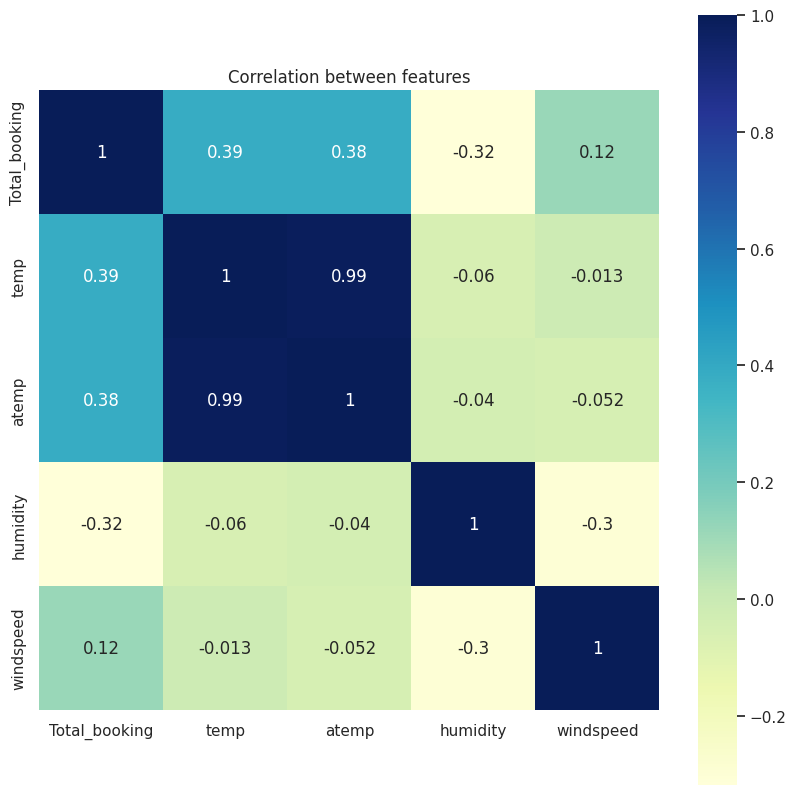

In [42]:
#Correlation heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation between features');
sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu")

nference : From the above correlation heatmap, we can observe that temp and atemp are highly correlated. Hence, we can drop anyone among them from the dataset.

In [44]:

new_df = new_df.drop('atemp', axis=1)

In [45]:
new_df


,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,61,16.9979,92,2012-11-07,1,Wednesday,November


Data Visualization

In [46]:
new_df['Total_booking'].describe()

count    8291.000000
mean      177.119407
std       156.753214
min         1.000000
25%        40.000000
50%       140.000000
75%       272.000000
max       650.000000
Name: Total_booking, dtype: float64

Distribution plot for Total_booking column

<ipython-input-47-3c0908548e4c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Total_booking'], bins = 20, color="green", kde=False)
<ipython-input-47-3c0908548e4c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Total_booking'], bins = 20, color="green", kde=True)


Text(0.5, 1.0, 'Distribution of Total booking')

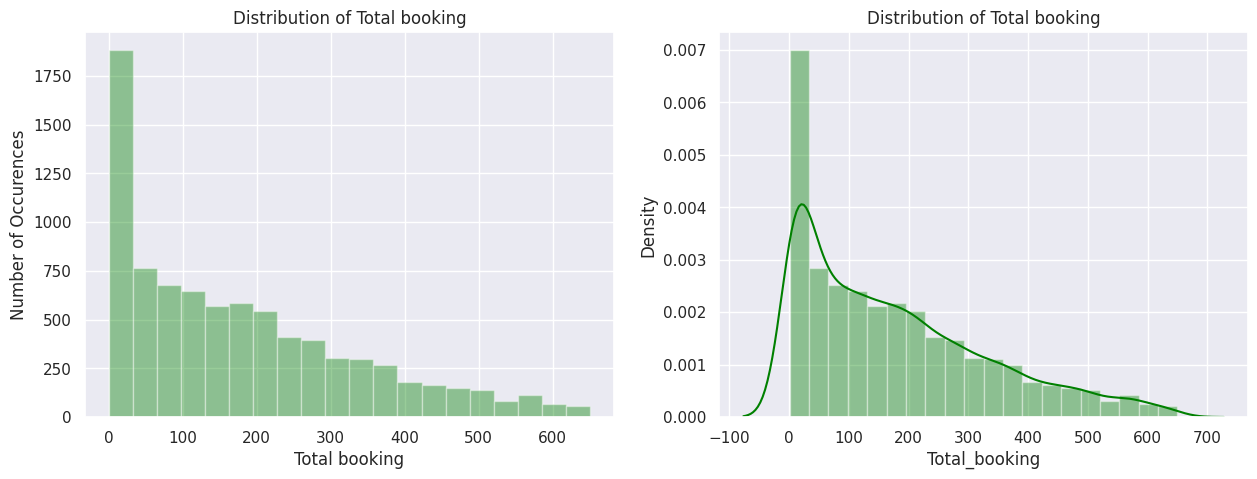

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_df['Total_booking'], bins = 20, color="green", kde=False)
plt.title("Distribution of Total booking")
plt.ylabel("Number of Occurences")
plt.xlabel("Total booking")
plt.subplot(1,2,2)
sns.distplot(new_df['Total_booking'], bins = 20, color="green", kde=True)
plt.title("Distribution of Total booking")

In [48]:

new_df

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,2012-05-02,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,2012-09-05,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,2011-01-13,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,2011-11-18,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,2011-09-13,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,54,6.0032,13,2012-01-16,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,87,0.0000,11,2011-11-10,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,56,8.9981,1,2011-04-12,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,61,16.9979,92,2012-11-07,1,Wednesday,November


Text(0, 0.5, 'Total number of bookings')

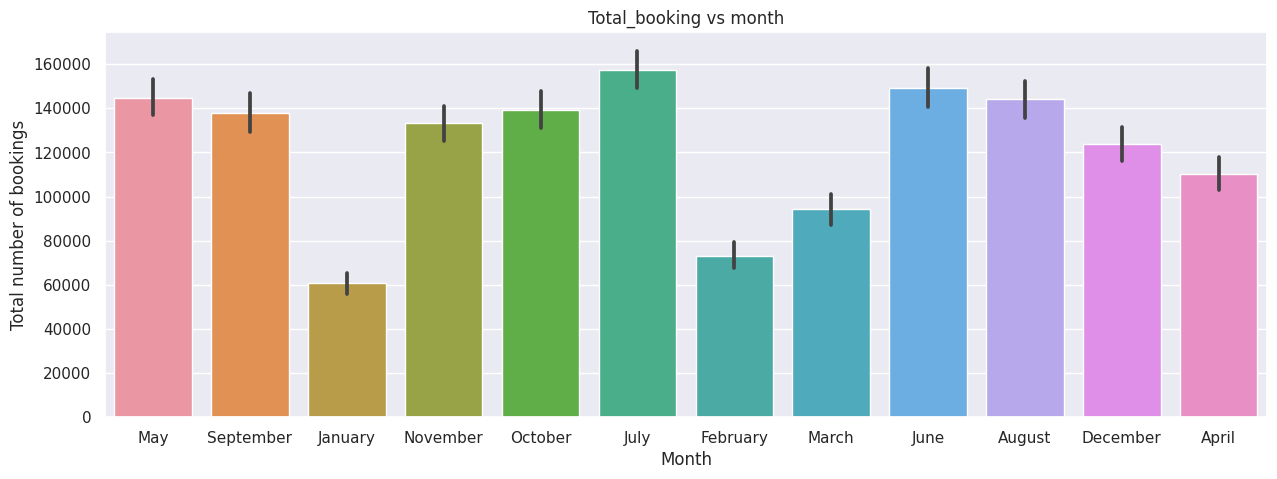

In [49]:
#Visualize total booking vs month
plt.figure(figsize=(15,5))
sns.barplot(x='month', y='Total_booking', estimator = sum, data=new_df)
plt.title("Total_booking vs month")
plt.xlabel("Month")
plt.ylabel("Total number of bookings")

Text(0, 0.5, 'Total number of bookings')

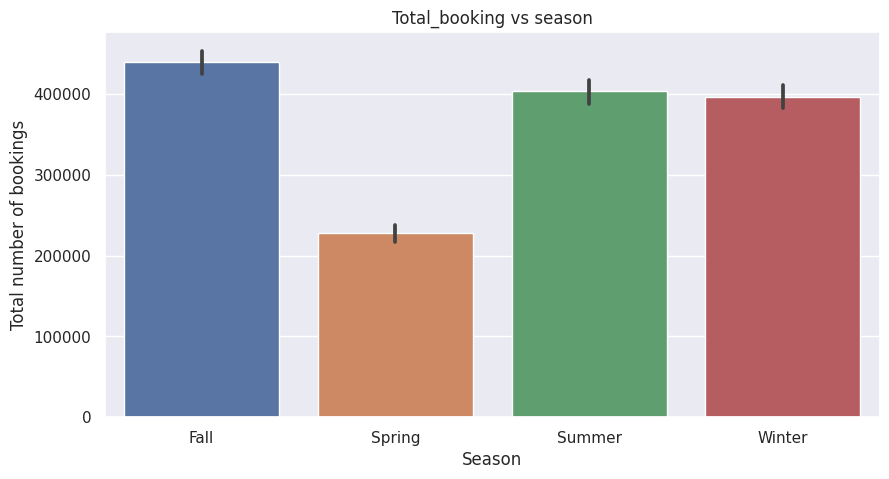

In [50]:
#Visualize total booking vs season
plt.figure(figsize=(10,5))
sns.barplot(x='season', y='Total_booking', estimator = sum, data=new_df)
plt.title("Total_booking vs season")
plt.xlabel("Season")
plt.ylabel("Total number of bookings")

Text(0, 0.5, 'Average Total number of bookings per hour')

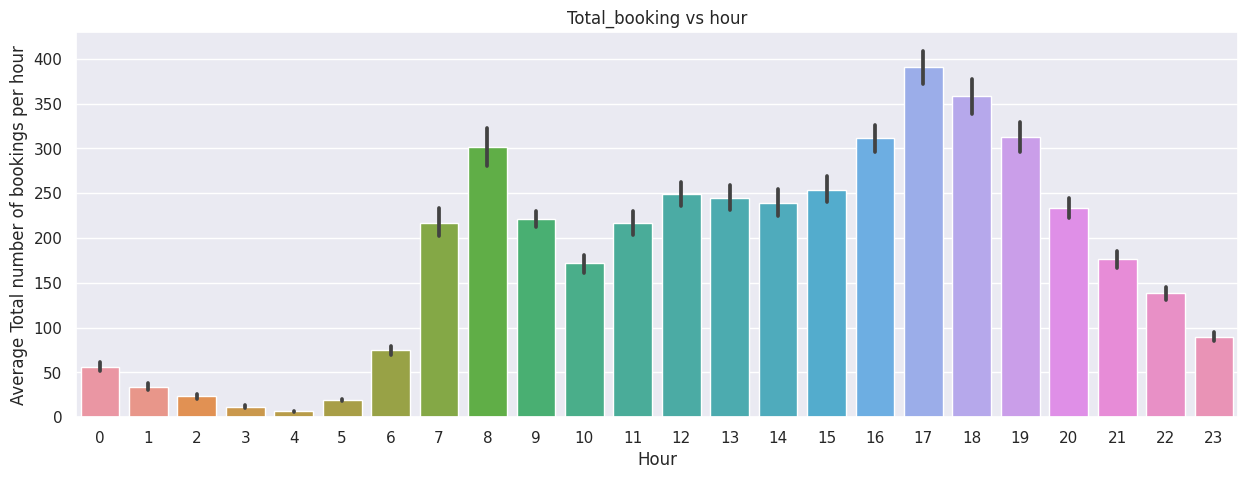

In [51]:
#Visualize total booking vs hour
plt.figure(figsize=(15,5))
sns.barplot(x='hour', y='Total_booking', estimator = np.mean, data=new_df)
plt.title("Total_booking vs hour")
plt.xlabel("Hour")
plt.ylabel("Average Total number of bookings per hour")

Text(0, 0.5, 'Total number of bookings')

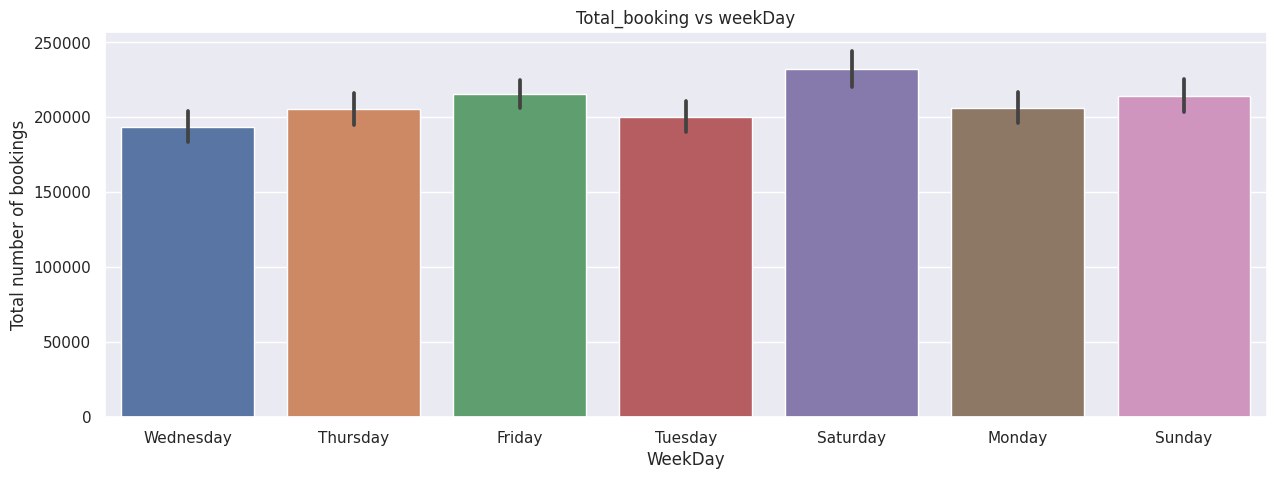

In [52]:
#Visualize total booking vs weekDay
plt.figure(figsize=(15,5))
sns.barplot(x='weekDay', y='Total_booking', estimator = sum, data=new_df)
plt.title("Total_booking vs weekDay")
plt.xlabel("WeekDay")
plt.ylabel("Total number of bookings")

<Axes: xlabel='month', ylabel='Total_booking'>

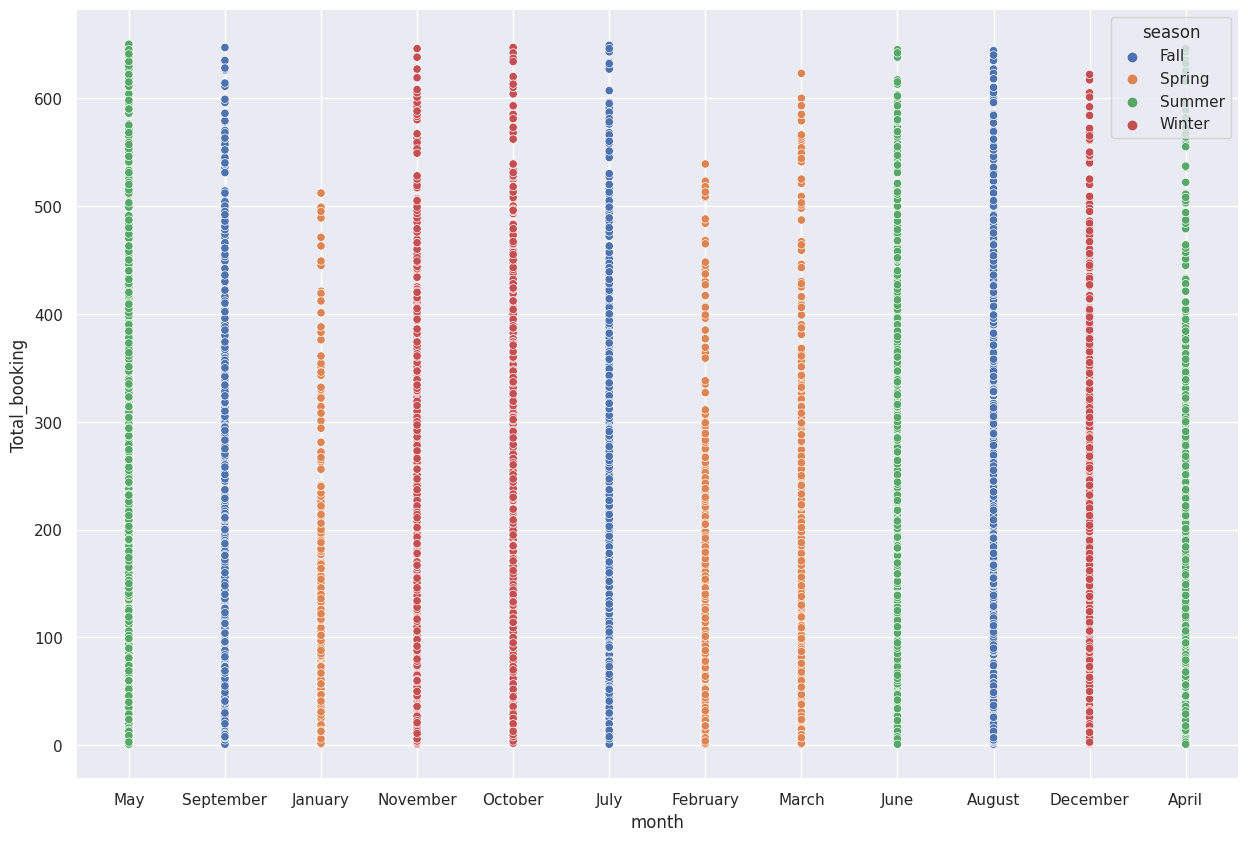

In [53]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='month', y='Total_booking' , hue='season', data = new_df)

Histograms for Continuous data

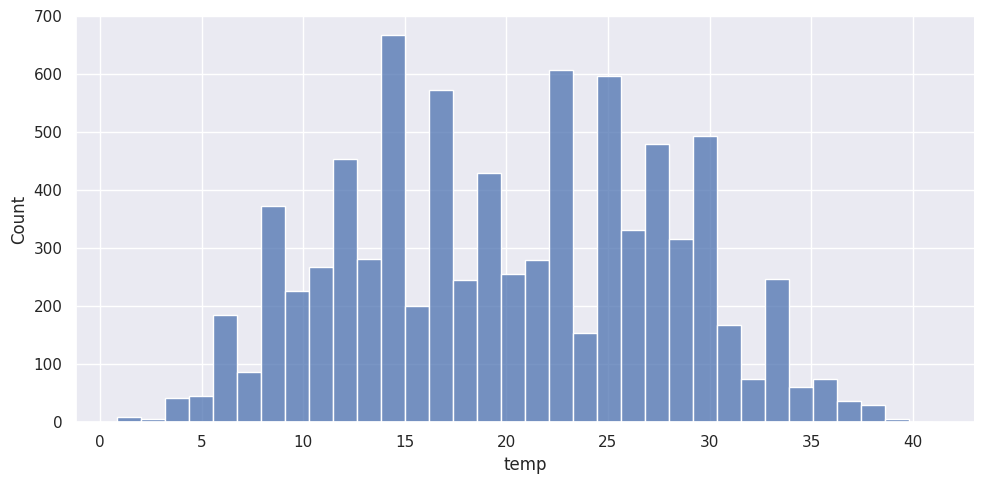

In [54]:
#Histogram for temp
#plt.figure(figsize=(5,5))
sns.displot(data=new_df, x='temp', kind='hist', height=5, aspect=2)

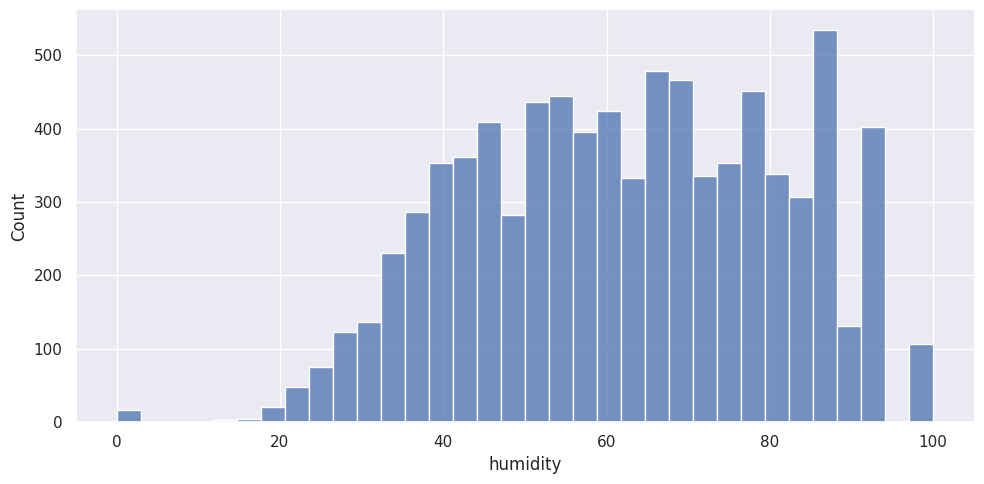

In [55]:
#Histogram for humididty
sns.displot(data=new_df, x='humidity', kind='hist', height=5, aspect=2)

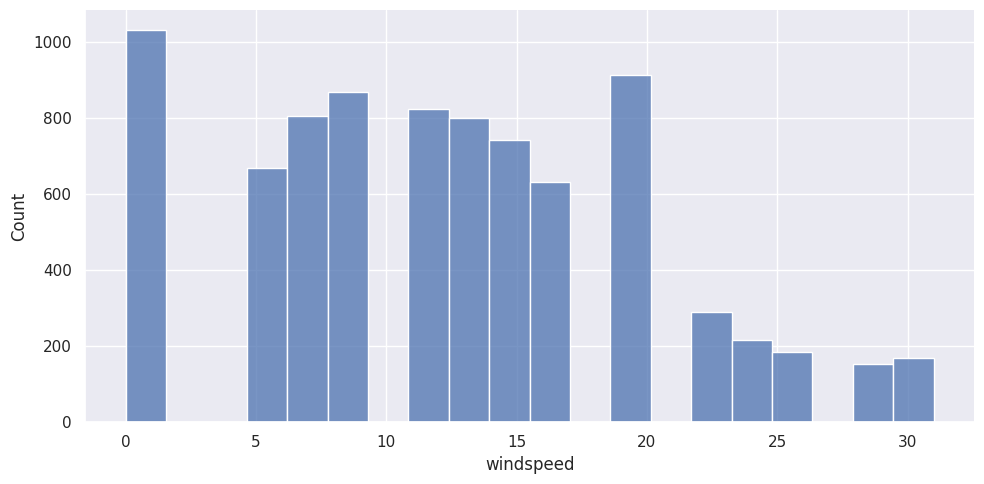

In [56]:
#Histogram for windspeed
sns.displot(data=new_df, x='windspeed',bins = 20, kind='hist', height=5, aspect=2)

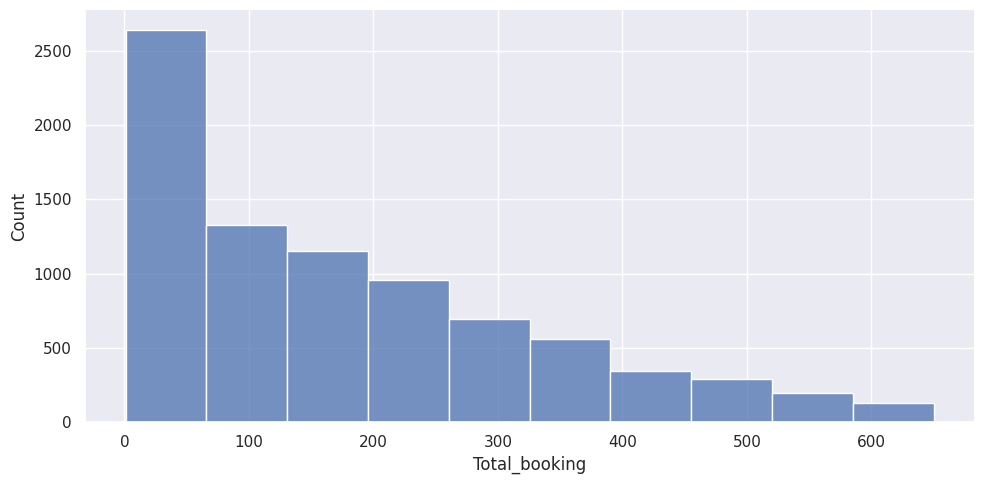

In [57]:
#Histogram for Total_booking
sns.displot(data=new_df, x='Total_booking', bins = 10, kind='hist', height=5, aspect=2)

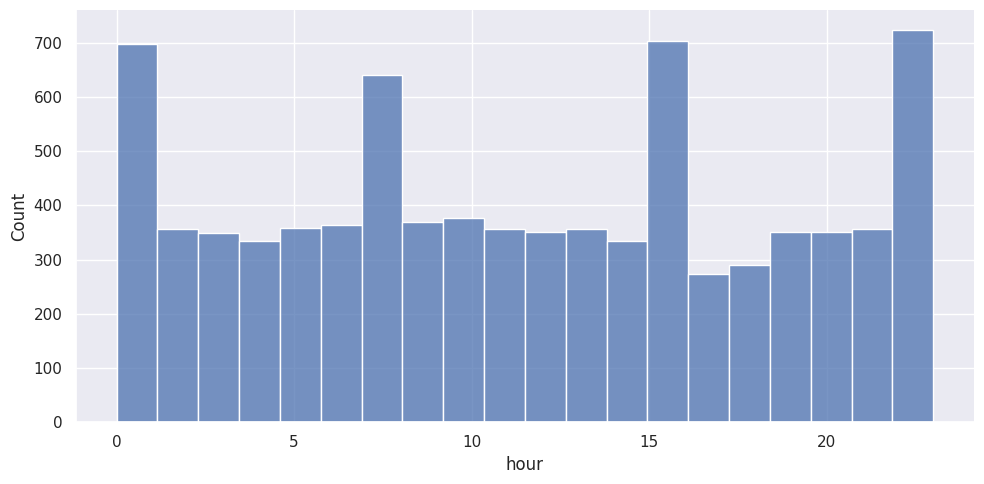

In [58]:
#Histogram for Hour
sns.displot(data=new_df, x='hour', kind='hist', height=5, aspect=2)

In [59]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8291 non-null   category
 1   holiday        8291 non-null   category
 2   workingday     8291 non-null   category
 3   weather        8291 non-null   category
 4   temp           8291 non-null   float64 
 5   humidity       8291 non-null   int64   
 6   windspeed      8291 non-null   float64 
 7   Total_booking  8291 non-null   int64   
 8   date           8291 non-null   object  
 9   hour           8291 non-null   int64   
 10  weekDay        8291 non-null   object  
 11  month          8291 non-null   object  
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 874.0+ KB


In [60]:
#Remove date column as the values are unique
new_df = new_df.drop('date', axis=1)
new_df

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,4.10,54,6.0032,13,6,Monday,January
8704,Winter,0,1,Mist + Cloudy,16.40,87,0.0000,11,1,Thursday,November
8705,Summer,0,1,Mist + Cloudy,23.78,56,8.9981,1,3,Tuesday,April
8706,Winter,0,1,Mist + Cloudy,11.48,61,16.9979,92,1,Wednesday,November


Convert all Categorical variables into one hot vector

In [61]:
one_hot_encoded_data = pd.get_dummies(new_df, columns = ['month','weekDay','weather','season'])
print(one_hot_encoded_data)

     holiday workingday   temp  humidity  windspeed  Total_booking  hour  \
0          0          1  22.14        77    16.9979            504    19   
1          0          1  28.70        79    19.0012              5     4   
2          0          1   5.74        50    22.0028            139     9   
3          0          1  13.94        29     8.9981            209    16   
4          0          1  30.34        51    19.0012            184    13   
...      ...        ...    ...       ...        ...            ...   ...   
8703       1          0   4.10        54     6.0032             13     6   
8704       0          1  16.40        87     0.0000             11     1   
8705       0          1  23.78        56     8.9981              1     3   
8706       0          1  11.48        61    16.9979             92     1   
8707       0          1   5.74        50    19.9995             31    10   

      month_April  month_August  month_December  ...  weekDay_Tuesday  \
0             

In [62]:
df_encoded = pd.DataFrame(one_hot_encoded_data)

In [63]:

df_encoded

,holiday,workingday,temp,humidity,windspeed,Total_booking,hour,month_April,month_August,month_December,...,weekDay_Tuesday,weekDay_Wednesday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,season_Fall,season_Spring,season_Summer,season_Winter
0,0,1,22.14,77,16.9979,504,19,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,0,1,28.70,79,19.0012,5,4,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,1,5.74,50,22.0028,139,9,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,13.94,29,8.9981,209,16,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,30.34,51,19.0012,184,13,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,0,4.10,54,6.0032,13,6,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8704,0,1,16.40,87,0.0000,11,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8705,0,1,23.78,56,8.9981,1,3,1,0,0,...,1,0,0,0,0,1,0,0,1,0
8706,0,1,11.48,61,16.9979,92,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [64]:
#Define Input and Output/Target variables
X = df_encoded.drop('Total_booking', axis=1)
y = df_encoded['Total_booking']

In [65]:
#Split your dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

In [67]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
y_pred_test_rf = model_rf.predict(X_test)

In [68]:
#Random Forest Regressor Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_rf = mean_squared_error(y_test,y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r_squared_test_rf = r2_score(y_test,y_pred_test_rf)
print('RMSE for Random Forest Model with test dataset is: ',rmse_test_rf)
print('R-Squared for the Random Forest Model with test dataset is : ',r_squared_test_rf)

RMSE for Random Forest Model with test dataset is:  59.97776521845377
R-Squared for the Random Forest Model with test dataset is :  0.8548186892033696


RMSE for Random Forest Model with test dataset is:  59.85513261129355
R-Squared for the Random Forest Model with test dataset is :  0.8554117676980796

In [69]:
#Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor()
model_ada.fit(X_train,y_train)
y_pred_test_ada = model_ada.predict(X_test)

In [70]:
#Ada Boost Regressor Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_ada = mean_squared_error(y_test,y_pred_test_ada)
rmse_test_ada = np.sqrt(mse_test_ada)
r_squared_test_ada = r2_score(y_test,y_pred_test_ada)
print('RMSE for Ada Boost Regressor Model with test dataset is: ',rmse_test_ada)
print('R-Squared for the Ada Boost Regressor Model with test dataset is : ',r_squared_test_ada)

RMSE for Ada Boost Regressor Model with test dataset is:  113.44234169904095
R-Squared for the Ada Boost Regressor Model with test dataset is :  0.4806256244627177


In [71]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor()
model_bag.fit(X_train,y_train)
y_pred_test_bag = model_bag.predict(X_test)

In [72]:
#Bagging Regressor Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_bag = mean_squared_error(y_test,y_pred_test_bag)
rmse_test_bag = np.sqrt(mse_test_bag)
r_squared_test_bag = r2_score(y_test,y_pred_test_bag)
print('RMSE for Bagging Regressor Model with test dataset is: ',rmse_test_bag)
print('R-Squared for the Bagging Regressor Model with test dataset is : ',r_squared_test_bag)

RMSE for Bagging Regressor Model with test dataset is:  64.1464719068489
R-Squared for the Bagging Regressor Model with test dataset is :  0.833935920180643


In [73]:
#SVR
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train,y_train)
y_pred_test_svr = model_svr.predict(X_test)


In [74]:
#SVR Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_svr = mean_squared_error(y_test,y_pred_test_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
r_squared_test_svr = r2_score(y_test,y_pred_test_svr)
print('RMSE for SVR Model with test dataset is: ',rmse_test_svr)
print('R-Squared for the SVR Model with test dataset is : ',r_squared_test_svr)

RMSE for SVR Model with test dataset is:  139.07837276324426
R-Squared for the SVR Model with test dataset is :  0.21936259878329578


In [75]:
#K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
model_knr = KNeighborsRegressor()
model_knr.fit(X_train,y_train)
y_pred_test_knr = model_knr.predict(X_test)

In [76]:
#K-Neighbors Regressor Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_knr = mean_squared_error(y_test,y_pred_test_knr)
rmse_test_knr = np.sqrt(mse_test_knr)
r_squared_test_knr = r2_score(y_test,y_pred_test_knr)
print('RMSE for K-Neighbors Model with test dataset is: ',rmse_test_knr)
print('R-Squared for the K-Neighbors Model with test dataset is : ',r_squared_test_knr)

RMSE for K-Neighbors Model with test dataset is:  104.07824471364059
R-Squared for the K-Neighbors Model with test dataset is :  0.5628302815440844


In [77]:
rmse = {'Model':['Random Forest','Ada Boost','Bagging','SVR','K-Neighbors'], 'RMSE Value': [rmse_test_rf,rmse_test_ada,rmse_test_bag,rmse_test_svr,rmse_test_knr]}
rmse_df = pd.DataFrame(rmse)
rmse_df

,Model,RMSE Value
0,Random Forest,59.977765
1,Ada Boost,113.442342
2,Bagging,64.146472
3,SVR,139.078373
4,K-Neighbors,104.078245


Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

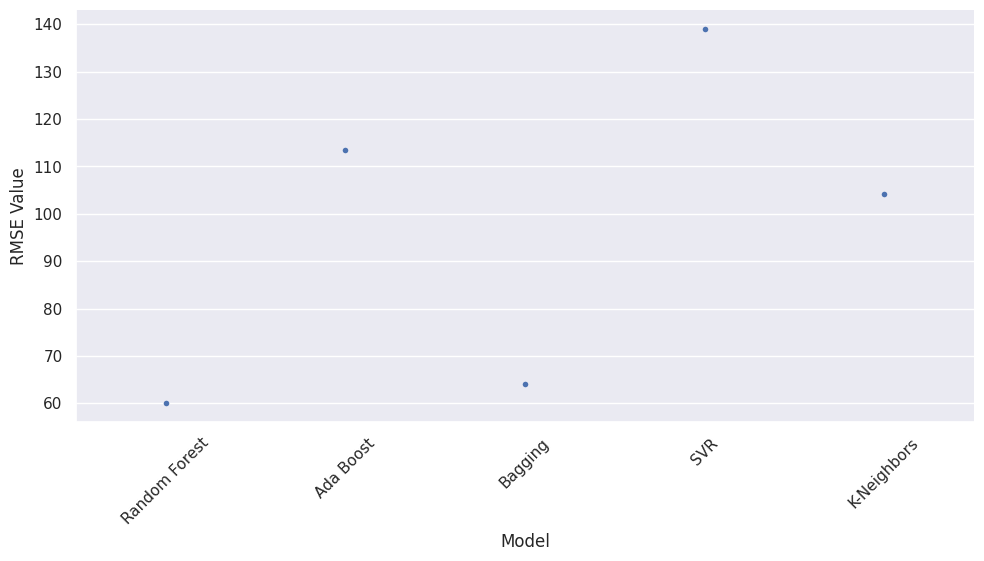

In [80]:
factplot= sns.catplot(x="Model",y="RMSE Value",size = 4,aspect = 2,data=rmse_df)
factplot.set_xticklabels(rotation=45)
plt.show()

From the above observations, Random forest is the best model

Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_

In [81]:
rf = RandomForestRegressor(random_state=42)

In [82]:
param_grid = { 
    'n_estimators': [200,300,400],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [20,30,40],
    'criterion' : ['mse','mae']
}

In [83]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: ignored

Perform prediction on the test set and print the mean_squared_log_error

In [92]:
model_rf = RandomForestRegressor(n_estimators=400,max_depth=40,random_state=0,verbose=1)
model_rf.fit(X_train,y_train)
y_pred_test_rf = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished


In [93]:
#Random Forest Regressor Model Evaluation for Test dataset
from sklearn.metrics import mean_squared_error,r2_score
mse_test_rf = mean_squared_error(y_test,y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r_squared_test_rf = r2_score(y_test,y_pred_test_rf)
print('RMSE for Random Forest Model with test dataset is: ',rmse_test_rf)
print('R-Squared for the Random Forest Model with test dataset is : ',r_squared_test_rf)

RMSE for Random Forest Model with test dataset is:  59.71116605586628
R-Squared for the Random Forest Model with test dataset is :  0.8561064729027232


In [94]:
from sklearn.metrics import mean_squared_log_error
MSLE = np.sqrt(mean_squared_log_error(y_test, y_pred_test_rf ))
print('Mean Squared log error for RF Regressor Model : ',MSLE)

Mean Squared log error for RF Regressor Model :  0.41109175949897886
